In [4]:
import scanpy as sc
import pandas as pd
import scanpy as sc
import drug2cell as d2c
import blitzgsea as blitz

In [5]:
data=pd.read_csv("data_out_xenium_5000.csv")

In [6]:
data

,Unnamed: 0,Barcode,V1,X,Y,Cluster,TACIT,UMAP-1,UMAP-2,A2ML1,...,ZPR1,ZSCAN1,ZSCAN12,ZSCAN16,ZSCAN20,ZSCAN26,ZSWIM6,ZUP1,ZYG11B,ZYX
0,1,aaaapche-1,1.0,1284.622020,893.001514,4,IgA Plasma Cells,1.993960,10.738587,0,...,1,0,1,0,0,0,0,0,0,0
1,2,aaabcfnd-1,2.0,1295.221524,907.094514,1,CD8+ Effector T Cells,-3.661805,2.855939,0,...,0,0,0,0,0,0,0,0,0,1
2,3,aaabelmn-1,3.0,1296.241504,881.628524,3,IgA Plasma Cells,4.353417,11.323970,0,...,0,0,1,0,0,1,0,0,0,0
3,4,aaabjmbg-1,4.0,1293.895524,889.576020,4,IgA Plasma Cells,3.718870,10.998681,0,...,0,0,1,2,0,1,0,0,0,0
4,5,aaabmcnn-1,5.0,1294.813524,895.628018,5,IgA Plasma Cells,8.703296,-4.881134,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152017,152018,oimbjfef-1,152018.0,4334.600580,503.387007,20,Others,4.312965,-0.454095,0,...,0,0,0,0,0,0,0,0,0,0
152018,152019,oimcannb-1,152019.0,4983.354600,377.451011,20,Others,3.423146,-1.456729,0,...,0,0,0,0,0,0,0,0,0,0
152019,152020,oimckogh-1,152020.0,4983.873120,382.831508,20,Others,4.083804,-1.386031,0,...,0,0,0,0,0,0,0,0,0,0
152020,152021,oimdakgf-1,152021.0,4884.652556,489.923010,5,Fibroblasts,8.321590,-6.774579,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
counts = data.iloc[:, 9:]

In [5]:
metadata=data.iloc[:, [1, 6]]

In [6]:
#counts = counts.transpose()  # This switches rows and columns
# Create AnnData object using counts
adata = sc.AnnData(X=counts)
# If using normalized data, set the .X attribute of the AnnData object to the normalized data
# adata.X = normalized_data.values

/lustre/home/huynhk4/.local/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
# Add metadata
adata.obs = metadata

In [8]:
# Perform PCA if not already done
if 'X_pca' not in adata.obsm.keys():
    sc.tl.pca(adata, svd_solver='arpack')

# Compute the neighborhood graph if not already done
if 'neighbors' not in adata.uns.keys():
    sc.pp.neighbors(adata)

# Compute UMAP
sc.tl.umap(adata)

/lustre/home/huynhk4/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


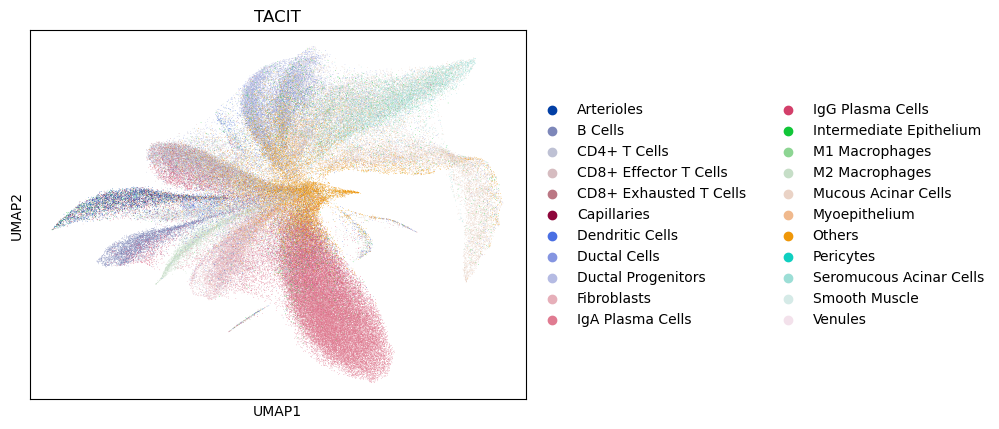

In [9]:
# Now UMAP data should be present, and you can plot it
sc.pl.umap(adata, color="TACIT")

In [10]:
d2c.score(adata, use_raw=True)

/lustre/home/huynhk4/.local/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


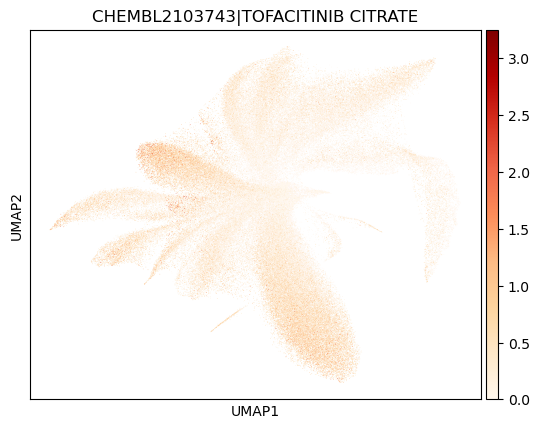

In [11]:
sc.pl.umap(adata.uns['drug2cell'], color="CHEMBL2103743|TOFACITINIB CITRATE", color_map="OrRd")

/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:434: PerformanceWarning: DataFram

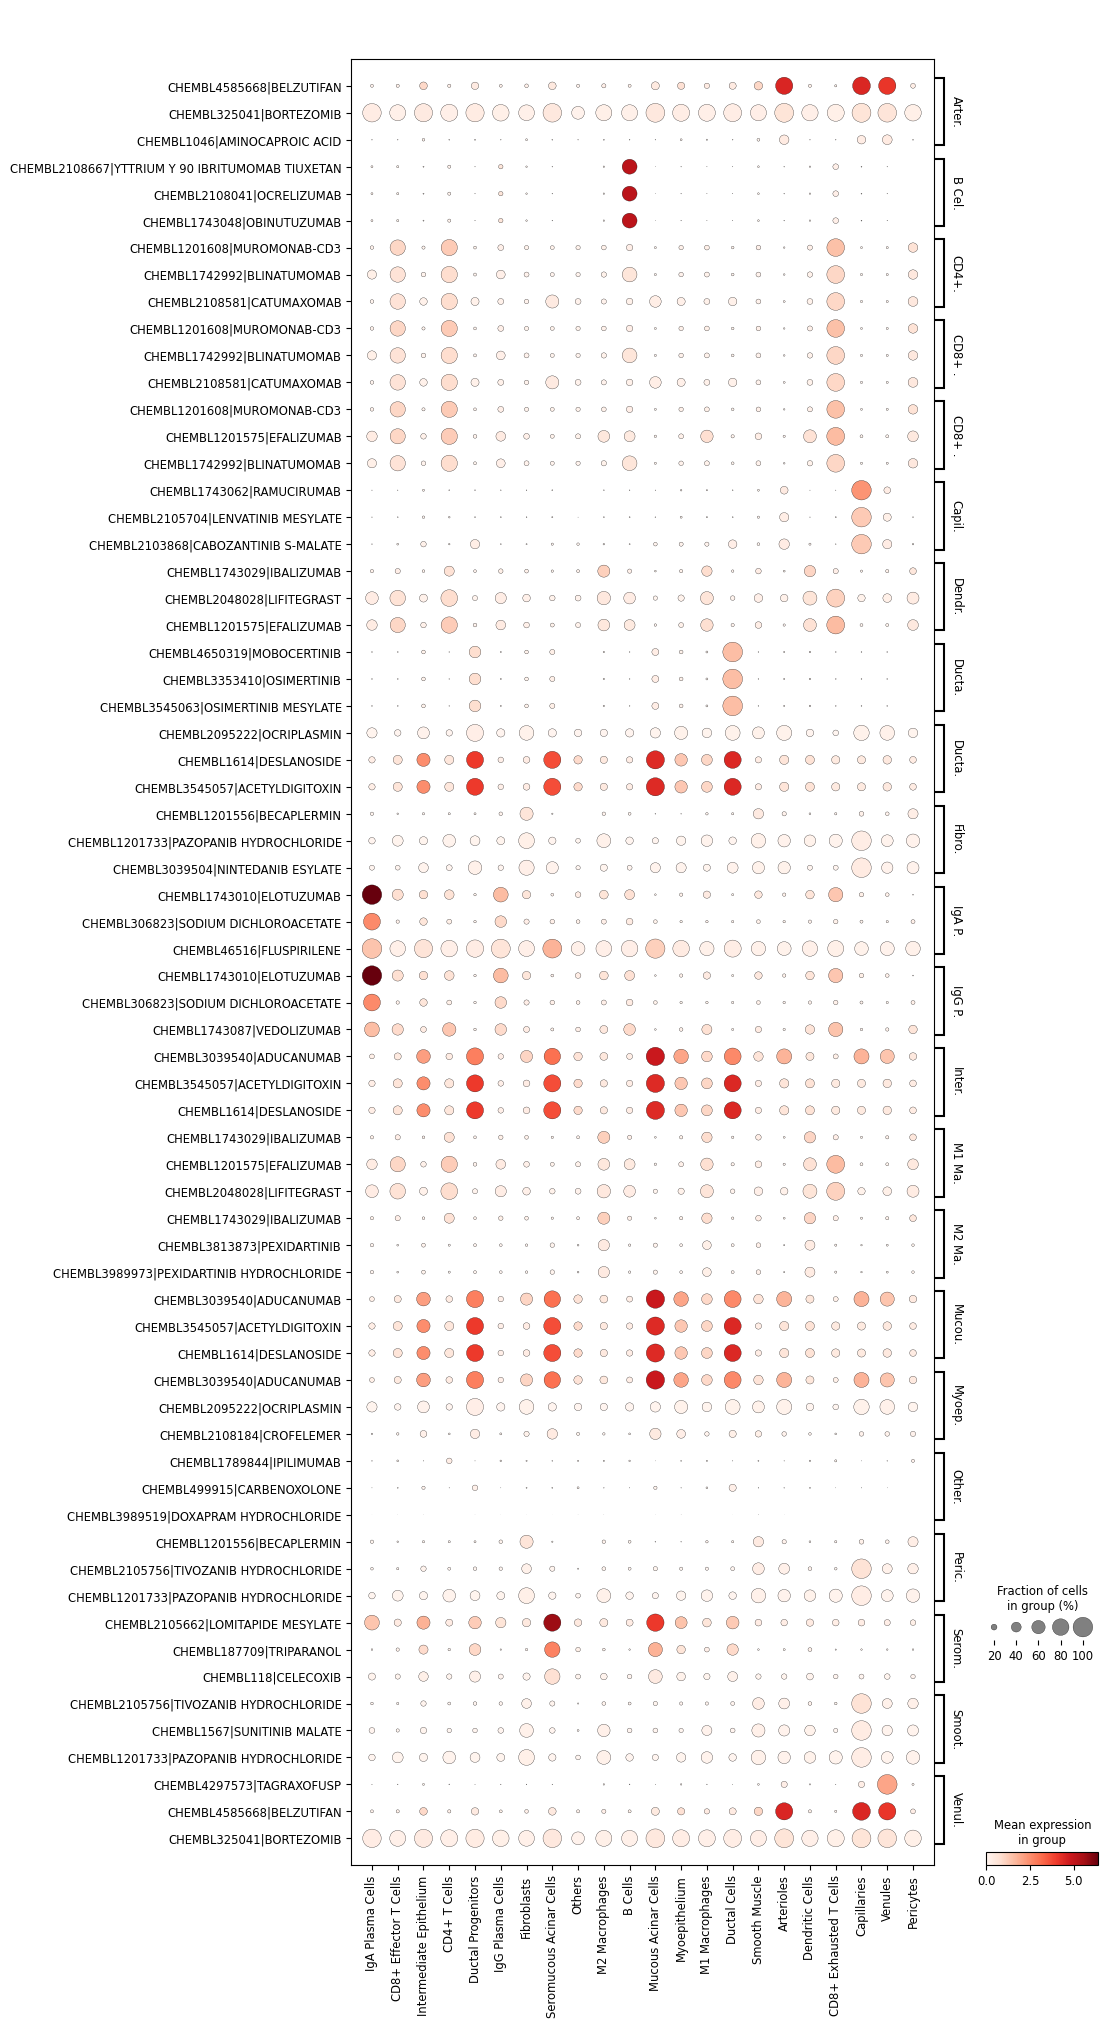

In [12]:
sc.tl.rank_genes_groups(adata.uns['drug2cell'], method="wilcoxon", groupby="TACIT")
sc.pl.rank_genes_groups_dotplot(adata.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=3)

In [13]:
import matplotlib.pyplot as plt

# Plot using Scanpy
ax = sc.pl.rank_genes_groups_dotplot(adata.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=5, show=False)

# Customize with Matplotlib (optional)
plt.title("Gene Rank Dotplot")
plt.xlabel("Groups")
plt.ylabel("Genes")

# Save the figure
plt.savefig('example_xenium_5K.png', dpi=600, bbox_inches='tight')
plt.close()

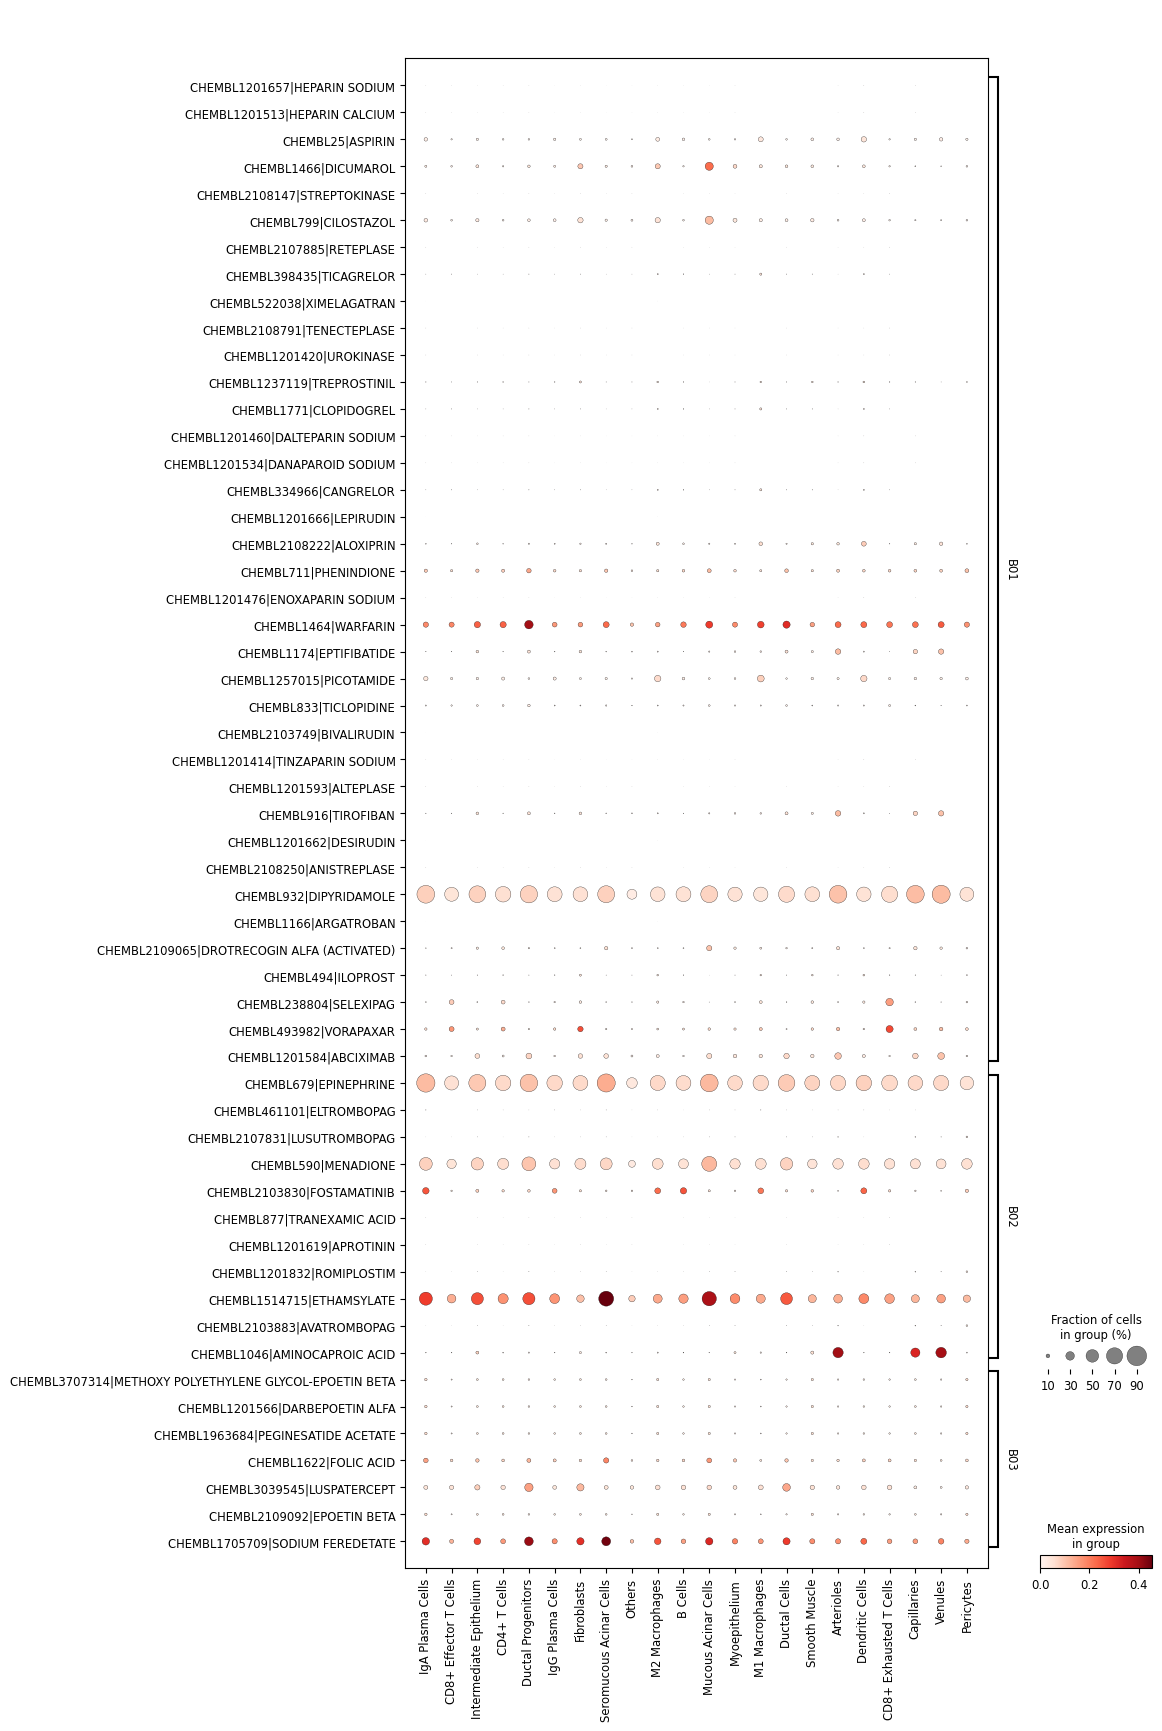

In [14]:
plot_args = d2c.util.prepare_plot_args(adata.uns['drug2cell'], categories=["B01","B02","B03"])
sc.pl.dotplot(adata.uns['drug2cell'], groupby="TACIT", swap_axes=True, **plot_args)

In [15]:
# Normalize the data if not already done
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithmize the data
sc.pp.log1p(adata)
#this is an old object, so it will benefit from having an up-to-date marker detection performed on it
sc.tl.rank_genes_groups(adata, method="wilcoxon", groupby="TACIT", use_raw=False)

/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:434: PerformanceWarning: DataFram

In [16]:
overrepresentation = d2c.hypergeometric(adata)
overrepresentation

{'Arterioles':                                              intersection  gene_group  \
 CHEMBL1615779|IOBENGUANE I 131                          0           1   
 CHEMBL1200764|METHACHOLINE CHLORIDE                     1           3   
 CHEMBL1201150|SUMATRIPTAN SUCCINATE                     0           2   
 CHEMBL516476|METHYLATROPINE NITRATE                     2           2   
 CHEMBL2103868|CABOZANTINIB S-MALATE                     2           2   
 ...                                                   ...         ...   
 CHEMBL117785|TETRABENAZINE                              0           1   
 CHEMBL511142|BUPRENORPHINE                              0           2   
 CHEMBL14|CARBACHOL                                      1           6   
 CHEMBL982|NALMEFENE                                     0           3   
 CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE             1           1   
 
                                              markers  universe     pvals  \
 CHEMBL1615779|IOBE

In [18]:
adata

AnnData object with n_obs × n_vars = 152022 × 4711
    obs: 'Barcode', 'TACIT'
    uns: 'pca', 'neighbors', 'umap', 'TACIT_colors', 'drug2cell', 'log1p', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [65]:
import pandas as pd

# Assuming 'overrepresentation' is your DataFrame and 'CD4+ T Cells' is a sub-DataFrame of it
# If 'overrepresentation' is the DataFrame with the data you provided:
overrepresentation_sorted = overrepresentation["CD8+ Effector T Cells"].sort_values(by='pvals')

overrepresentation_sorted

row_names = overrepresentation_sorted.index
df_out = pd.DataFrame(data=overrepresentation_sorted)
df_out['ID'] = row_names
df_out.to_csv('overrepresentation_sorted_CD8_Effector_T_Cells.csv', index=False)


In [66]:
overrepresentation_sorted

,intersection,gene_group,markers,universe,pvals,pvals_adj,ID
CHEMBL941|IMATINIB,9,11,1481,4711,0.000838,1.0,CHEMBL941|IMATINIB
CHEMBL1200981|EPIRUBICIN HYDROCHLORIDE,5,5,1481,4711,0.003056,1.0,CHEMBL1200981|EPIRUBICIN HYDROCHLORIDE
CHEMBL254219|DIGITOXIN,5,5,1481,4711,0.003056,1.0,CHEMBL254219|DIGITOXIN
CHEMBL1201165|QUINESTROL,4,4,1481,4711,0.009740,1.0,CHEMBL1201165|QUINESTROL
CHEMBL222863|OUABAIN,4,4,1481,4711,0.009740,1.0,CHEMBL222863|OUABAIN
...,...,...,...,...,...,...,...
CHEMBL3545367|LEMBOREXANT,0,2,1481,4711,1.000000,1.0,CHEMBL3545367|LEMBOREXANT
CHEMBL3989871|AVACOPAN,0,1,1481,4711,1.000000,1.0,CHEMBL3989871|AVACOPAN
CHEMBL2105748|PRUCALOPRIDE SUCCINATE,0,1,1481,4711,1.000000,1.0,CHEMBL2105748|PRUCALOPRIDE SUCCINATE
CHEMBL1607273|CETIRIZINE HYDROCHLORIDE,0,3,1481,4711,1.000000,1.0,CHEMBL1607273|CETIRIZINE HYDROCHLORIDE


In [67]:

import pandas as pd

# Assuming 'overrepresentation' is your DataFrame and 'CD4+ T Cells' is a sub-DataFrame of it
# If 'overrepresentation' is the DataFrame with the data you provided:
overrepresentation_sorted = overrepresentation["CD8+ Exhausted T Cells"].sort_values(by='pvals')


row_names = overrepresentation_sorted.index
df_out = pd.DataFrame(data=overrepresentation_sorted)
df_out['ID'] = row_names
df_out.to_csv('overrepresentation_sorted_CD8_Exhausted_T_Cells.csv', index=False)


In [68]:
overrepresentation_sorted

,intersection,gene_group,markers,universe,pvals,pvals_adj,ID
CHEMBL222863|OUABAIN,4,4,1370,4711,0.007130,1.0,CHEMBL222863|OUABAIN
CHEMBL941|IMATINIB,7,11,1370,4711,0.018024,1.0,CHEMBL941|IMATINIB
CHEMBL1559|MICONAZOLE NITRATE,3,3,1370,4711,0.024555,1.0,CHEMBL1559|MICONAZOLE NITRATE
CHEMBL1200522|AVOBENZONE,3,3,1370,4711,0.024555,1.0,CHEMBL1200522|AVOBENZONE
CHEMBL1089641|TRYPAN BLUE,3,3,1370,4711,0.024555,1.0,CHEMBL1089641|TRYPAN BLUE
...,...,...,...,...,...,...,...
CHEMBL1626570|HEXOCYCLIUM METHYLSULFATE,0,2,1370,4711,1.000000,1.0,CHEMBL1626570|HEXOCYCLIUM METHYLSULFATE
CHEMBL3989915|DIFELIKEFALIN,0,1,1370,4711,1.000000,1.0,CHEMBL3989915|DIFELIKEFALIN
CHEMBL3989973|PEXIDARTINIB HYDROCHLORIDE,0,3,1370,4711,1.000000,1.0,CHEMBL3989973|PEXIDARTINIB HYDROCHLORIDE
CHEMBL1201180|DICLOFENAC EPOLAMINE,0,2,1370,4711,1.000000,1.0,CHEMBL1201180|DICLOFENAC EPOLAMINE


In [69]:
targets = blitz.enrichr.get_library("GO_Molecular_Function_2021")

In [70]:
d2c.score(adata, targets=targets, use_raw=True)

/lustre/home/huynhk4/.local/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [74]:
sc.tl.rank_genes_groups(adata, method="wilcoxon", groupby="TACIT", use_raw=False)

/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/lustre/home/huynhk4/.local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:434: PerformanceWarning: DataFram

In [75]:
overrepresentation = d2c.hypergeometric(adata)


In [76]:

import pandas as pd

# Assuming 'overrepresentation' is your DataFrame and 'CD4+ T Cells' is a sub-DataFrame of it
# If 'overrepresentation' is the DataFrame with the data you provided:
overrepresentation_sorted = overrepresentation["CD8+ Exhausted T Cells"].sort_values(by='pvals')
row_names = overrepresentation_sorted.index
df_out = pd.DataFrame(data=overrepresentation_sorted)
df_out['ID'] = row_names
df_out.to_csv('overrepresentation_sorted_CD8_Exhausted_T_Cells_pathway.csv', index=False)

In [80]:
overrepresentation_sorted

,intersection,gene_group,markers,universe,pvals,pvals_adj,ID
cadherin binding (GO:0045296),73,122,1481,4711,5.417539e-11,6.403531e-08,cadherin binding (GO:0045296)
protein kinase binding (GO:0019901),114,232,1481,4711,6.280981e-09,3.712059e-06,protein kinase binding (GO:0019901)
kinase binding (GO:0019900),99,208,1481,4711,4.690240e-07,1.847954e-04,kinase binding (GO:0019900)
ubiquitin-like protein ligase binding (GO:0044389),65,130,1481,4711,6.051280e-06,1.677215e-03,ubiquitin-like protein ligase binding (GO:0044...
ubiquitin protein ligase binding (GO:0031625),62,123,1481,4711,7.094820e-06,1.677215e-03,ubiquitin protein ligase binding (GO:0031625)
...,...,...,...,...,...,...,...
icosanoid binding (GO:0050542),0,2,1481,4711,1.000000e+00,1.000000e+00,icosanoid binding (GO:0050542)
icosatetraenoic acid binding (GO:0050543),0,1,1481,4711,1.000000e+00,1.000000e+00,icosatetraenoic acid binding (GO:0050543)
RNA polymerase binding (GO:0070063),0,5,1481,4711,1.000000e+00,1.000000e+00,RNA polymerase binding (GO:0070063)
histone demethylase activity (H3-K27 specific) (GO:0071558),0,3,1481,4711,1.000000e+00,1.000000e+00,histone demethylase activity (H3-K27 specific)...


In [78]:
import pandas as pd
# Assuming 'overrepresentation' is your DataFrame and 'CD4+ T Cells' is a sub-DataFrame of it
# If 'overrepresentation' is the DataFrame with the data you provided:
overrepresentation_sorted = overrepresentation["CD8+ Effector T Cells"].sort_values(by='pvals')

overrepresentation_sorted

row_names = overrepresentation_sorted.index
df_out = pd.DataFrame(data=overrepresentation_sorted)
df_out['ID'] = row_names
df_out.to_csv('overrepresentation_sorted_CD8_Effector_T_Cells_pathway.csv', index=False)

In [82]:
adata

AnnData object with n_obs × n_vars = 152022 × 4711
    obs: 'Barcode', 'TACIT'
    uns: 'pca', 'neighbors', 'umap', 'TACIT_colors', 'rank_genes_groups', 'log1p', 'drug2cell'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [51]:
targets = blitz.enrichr.get_library("GO_Molecular_Function_2021")
del adata.uns['drug2cell']

In [52]:
#remove the score space object for illustration purposes
#that it's really possible to run these functions with just the targets passed

enrichment, plot_gsea_args = d2c.gsea(adata, targets=targets)
d2c.util.plot_gsea(enrichment, n=5, **plot_gsea_args)

/lustre/home/huynhk4/.local/lib/python3.11/site-packages/blitzgsea/plot.py:162: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5,0.5*n), frameon=False)


TypeError: unhashable type: 'slice'

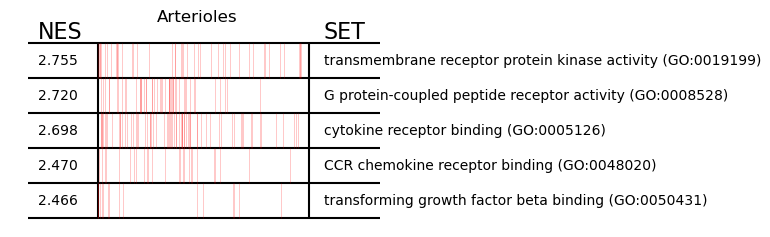

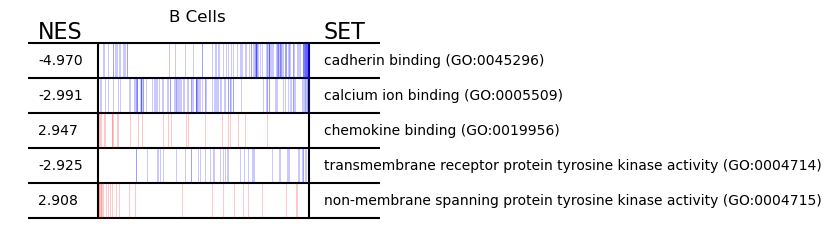

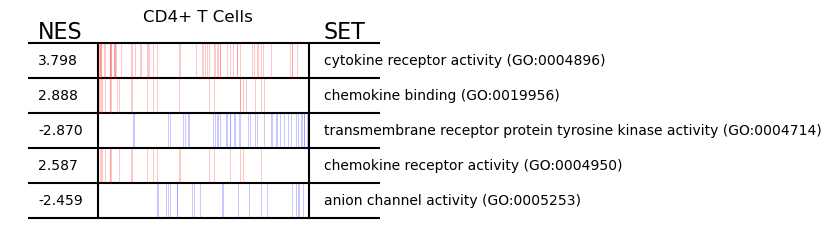

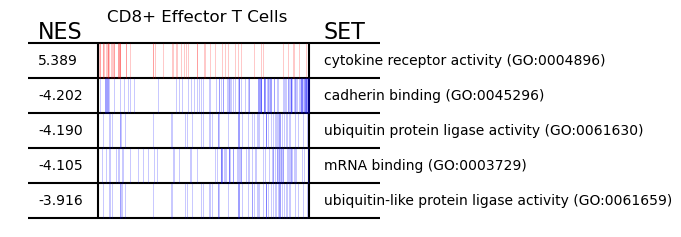

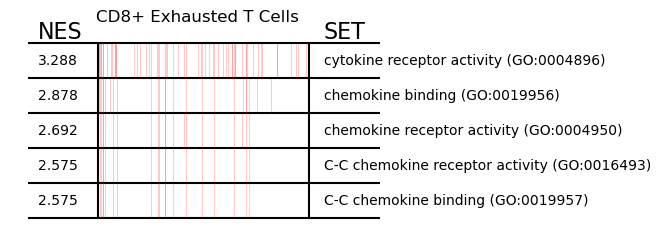

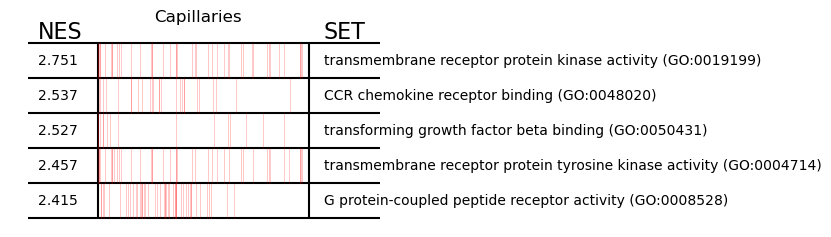

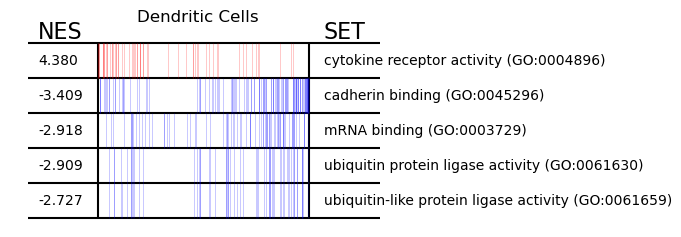

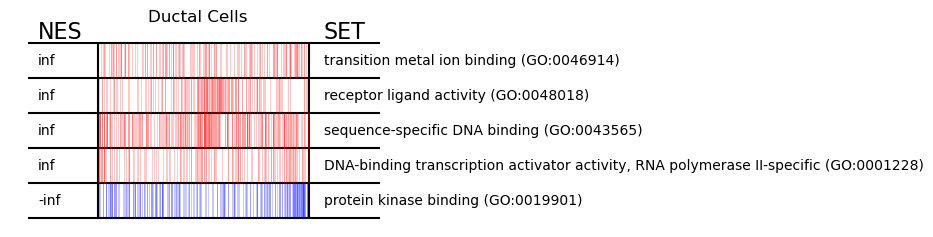

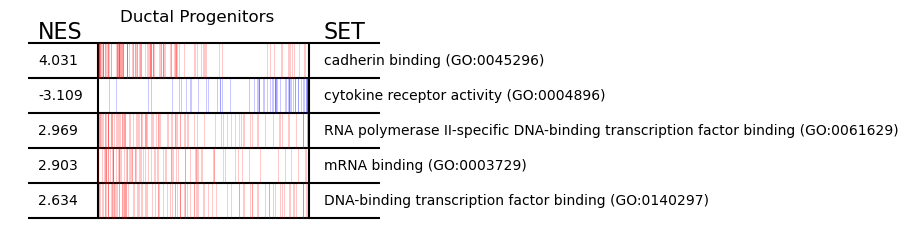

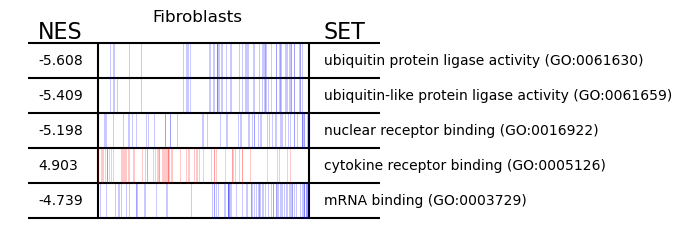

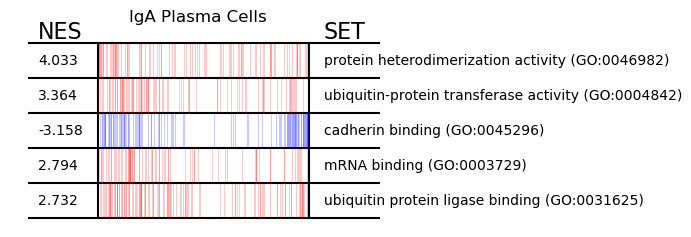

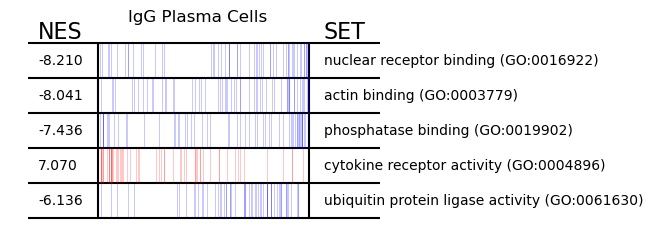

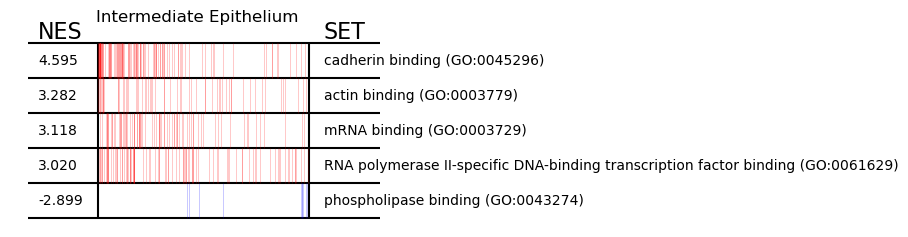

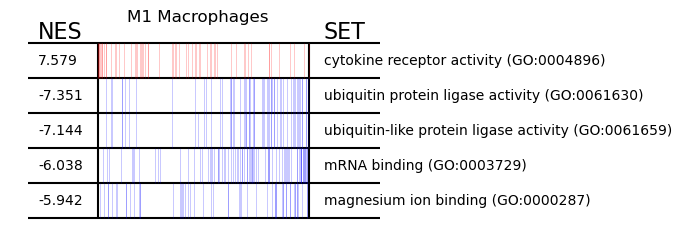

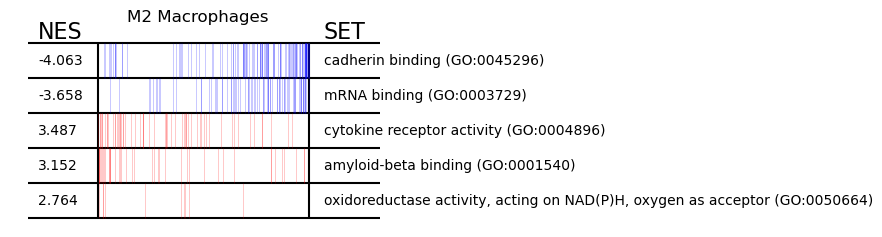

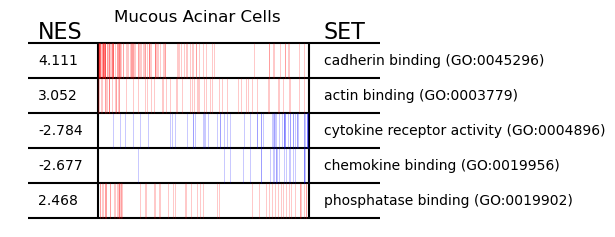

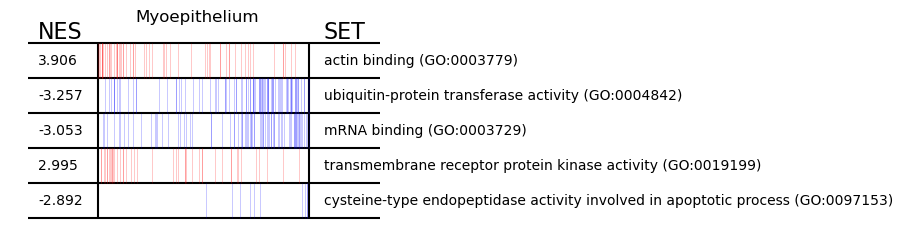

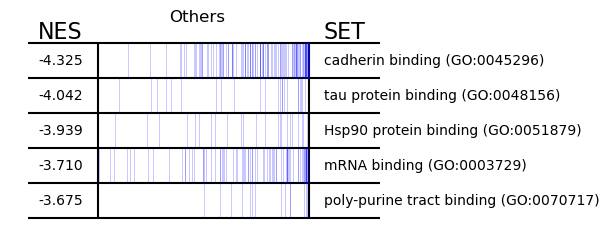

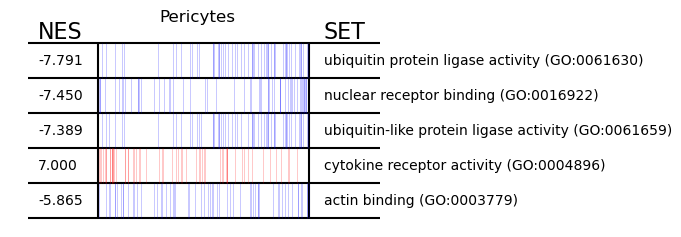

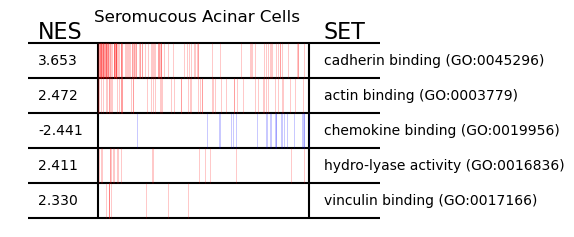

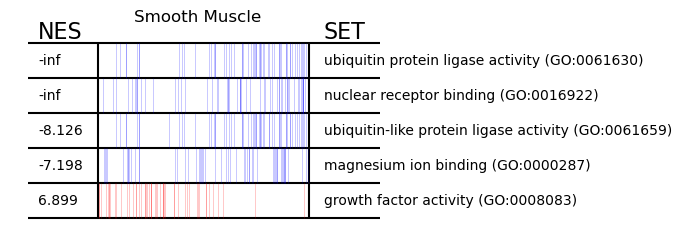

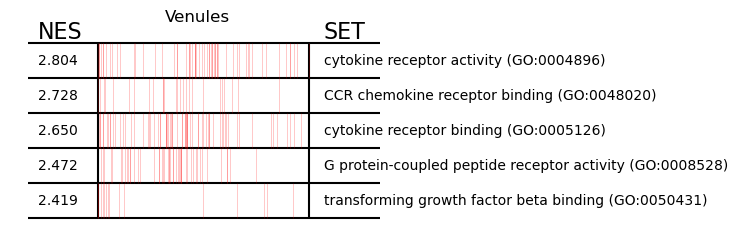

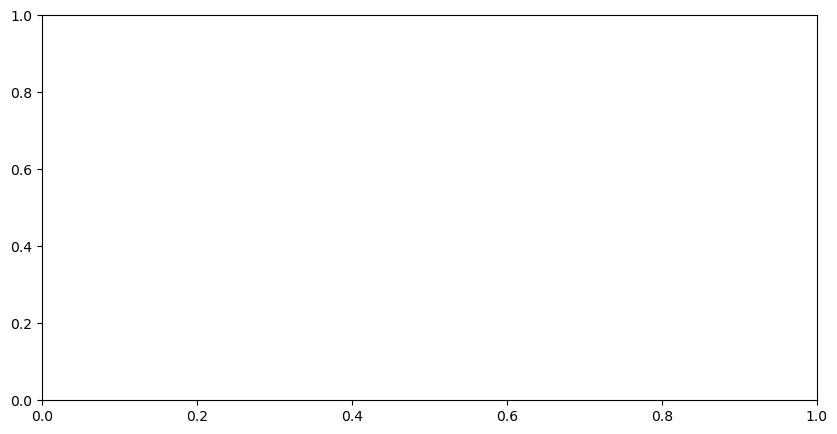

In [35]:
#remove the score space object for illustration purposes
#that it's really possible to run these functions with just the targets passed
#del adata.uns['drug2cell']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Your GSEA plotting might be defined or wrapped in a custom function
def plot_gsea_custom(enrichment, n=5, **kwargs):
    # Assuming the function uses Matplotlib to create a figure
    fig, ax = plt.subplots(figsize=(10, 5))  # You can specify the size as needed
    # The actual plotting logic, modify as necessary based on your data
    # This is an example, replace with actual plotting commands
    ax.bar(range(n), enrichment[:n], color='blue')  # Example, modify accordingly
    ax.set_title('GSEA Top Enrichments')
    ax.set_ylabel('Enrichment Score')
    ax.set_xlabel('Gene Sets')
    plt.xticks(range(n), labels=[f"Set {i+1}" for i in range(n)], rotation=45)
    plt.tight_layout()
    plt.show()

enrichment, plot_gsea_args = d2c.gsea(adata, targets=targets)
# Call your custom plot function
plot_gsea_custom(enrichment, n=5)

In [ ]:
fig = blitz.plot.running_sum(
    signature = plot_gsea_args['scores']['CD8+ Exhausted T Cells'],
    library = plot_gsea_args['targets'],
    result = enrichment['CD8+ Exhausted T Cells'],
    geneset = ""
)
plot_gsea_custom(fig)